In [1]:
%run test.ipynb
pd.options.mode.chained_assignment = None

In [2]:
names={'adickes_bettge1':[8055,8075], 
       
       'arnold1':[7994,8006], 'arnold2':[8006,8018],
       
       'bettge1':[8032,8053], 'bettge2':[8074,8086],
       'bettge3':[7987,8007],'bettge4':[8011,8022],
       'bettge5':[7989,7993],'bettge6':[8040,8047],
       
       'brandt1':[8088,8096],'brandt2':[8092,8098],'brandt3':[8111,8119],
       
       'migura1':[8026,8028],
       
       'warwas1':[7982,7992]}

In [3]:
name='brandt2'
df=pd.read_csv('logs/'+name+'.csv')
if name == 'brandt3':
    df.columns=['DEPT', 'GR', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
    df['SP']=None
else:
    df.columns=['DEPT', 'GR', 'SP', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
df

,DEPT,GR,SP,LL8,ILM,ILD,DPHI,NPHI
0,8075.5,115.309126,-0.725402,3.691990,3.398547,3.113790,-999.250000,0.319046
1,8076.0,115.528255,-0.838247,3.759931,3.598650,3.174127,-999.250000,0.310989
2,8076.5,114.474930,-0.901440,4.062263,3.614396,3.247422,-999.250000,0.300660
3,8077.0,113.977105,-0.925033,4.379892,3.636241,3.322881,-999.250000,0.291902
4,8077.5,115.523042,-0.919074,4.434590,3.705752,3.386659,-999.250000,0.288090
...,...,...,...,...,...,...,...,...
223,8187.0,89.371149,-72.234628,5.018257,2.383759,2.117126,0.187912,0.183671
224,8187.5,89.168536,-70.495121,5.326361,2.421211,2.073837,0.187909,0.186214
225,8188.0,90.062209,-68.063038,5.744304,2.419850,2.054260,0.186301,0.186382
226,8188.5,92.308240,-66.619885,6.014648,2.405862,2.071227,0.183913,0.184572


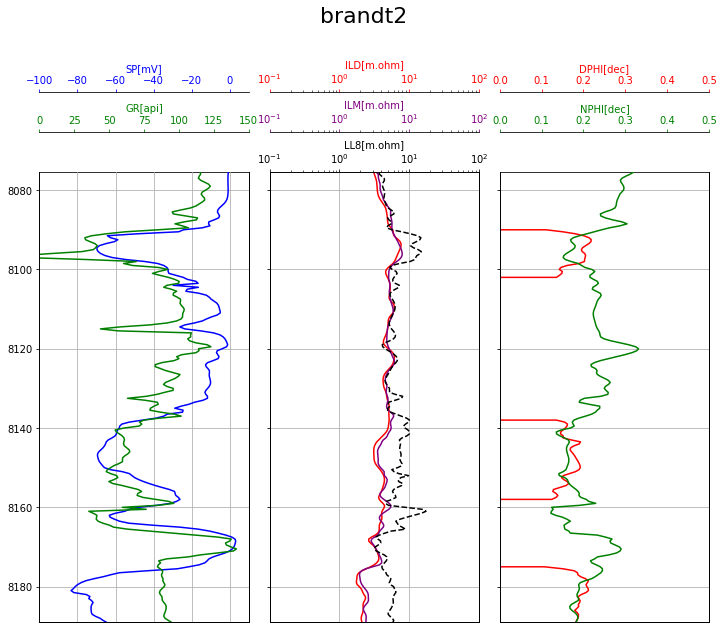

In [4]:
triple_combo_plot(df, df.DEPT.min(),df.DEPT.max(),name,save=False)

In [5]:
#look up table
Log_dict={'Rw':.0474,
          'm':1,
          'n':2,
          'a':2}

lookup_table=pd.read_csv('Log_analysis.csv')
lookup_table[lookup_table.name==name]

,name,shale_gr,shale_density,shale_neutron,shale_resistivity,sand_gr,notes
10,brandt2,122.0,0.08,0.31,3.775,29.0,ask daigle about missing shale density


In [9]:
df_payzone=log_calculation(df,name)
df_payzone

,DEPT,GR,SP,LL8,ILM,ILD,DPHI,NPHI,Csh,phiss,Rss,Sw
33,8092.0,32.579064,-62.661904,14.744480,6.430245,6.463929,0.213149,0.175538,0.038485,0.195814,6.653621,0.269745
34,8092.5,33.027274,-58.794160,14.265102,6.660199,7.005691,0.218449,0.169192,0.043304,0.196223,7.288011,0.257469
35,8093.0,36.283549,-60.653412,12.678493,6.884796,7.439417,0.217779,0.170711,0.078318,0.197364,8.108210,0.243392
36,8093.5,39.888838,-65.147149,11.104916,7.105246,7.647693,0.212680,0.175876,0.117084,0.197508,8.851935,0.232859
37,8094.0,41.422028,-68.508453,10.453874,7.323513,7.664531,0.205006,0.180035,0.133570,0.194808,9.111845,0.231099
38,8094.5,40.329664,-69.750546,11.445121,7.536842,7.544634,0.198169,0.179231,0.121824,0.189719,8.757832,0.238864
39,8095.0,38.664904,-69.756158,13.471976,7.728617,7.348898,0.194914,0.174020,0.103924,0.184942,8.255316,0.249183
40,8095.5,30.490199,-69.119499,14.935290,7.878537,7.134023,0.196985,0.166515,0.016024,0.182362,7.238916,0.267978
41,8096.0,7.964331,-67.767799,14.554965,7.958784,6.925314,0.203085,0.158831,-0.226190,0.183575,6.001449,0.293338
42,8096.5,-12.147667,-65.538093,12.933604,7.907742,6.728673,0.205057,0.153081,-0.442448,0.184763,5.426358,0.307498


Text(0, 0.5, 'Probability')

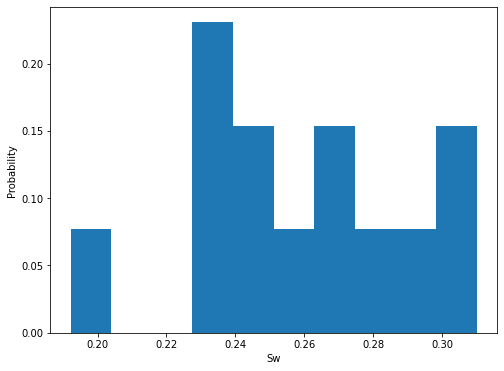

In [22]:
Sw=df_payzone.Sw.to_numpy()
weights = np.ones_like(Sw) / (len(Sw))
plt.figure(figsize=(8,6))
plt.hist(Sw, bins=10,weights=weights)
plt.xlabel('Sw')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

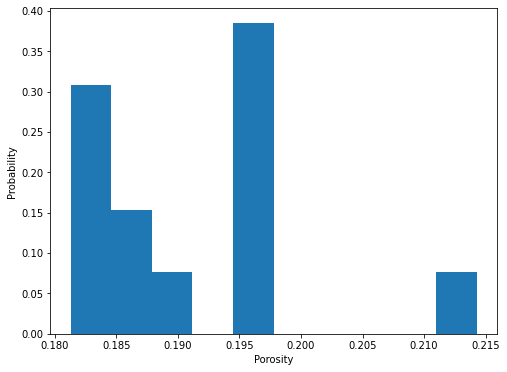

In [23]:
phiss=df_payzone.phiss.to_numpy()
weights = np.ones_like(phiss) / (len(phiss))
plt.figure(figsize=(8,6))
plt.hist(phiss, bins=10,weights=weights)
plt.xlabel('Porosity')
plt.ylabel('Probability')

In [30]:
Sw_dict={}
Phi_dict={}
P=[10,50,90]
for i in P:
    Sw_dict[str(name)+'_P' + str(i)]=np.percentile(Sw,i)

TypeError: unsupported operand type(s) for -: 'function' and 'function'

In [31]:
Sw_dict[str(name)+'_P' + str(1)]=1

In [32]:
Sw_dict

{'brandt2_P1': 1}